### IMDB Movie Review Data Set

In [1]:
# Download IMDB to current folder
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# # Unzip
# !tar zxf aclImdb_v1.tar.gz
# # aclImdb/train/unsup removed as unlabeled
# !rm -rf aclImdb/train/unsup
# # Show IMDB dataset description
# !cat aclImdb/README

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display of correspondence between 0,1 and meaning of label
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[1]))

x : Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you're choice over this one, even the "Turbulence"-movies a

### Bag of Words

In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1-grim
vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df1 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

# 2-grim
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df2 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

print("1-gram")
display(df1)
print("2-grim")
display(df2)

1-gram


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


2-grim


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## [Problem 1] Scratch implementation of BoW

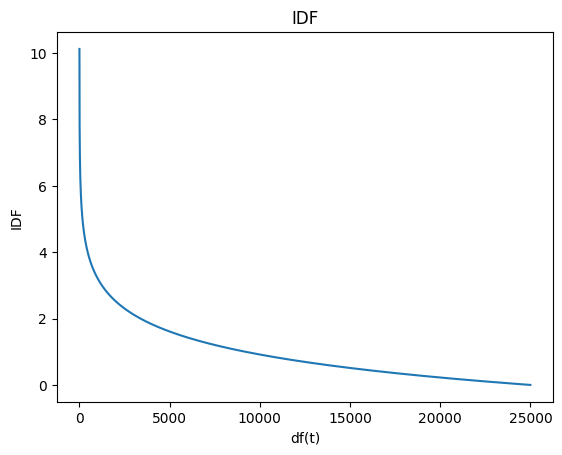

In [6]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

### Stop word

In [7]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [8]:
# Download Stopword for first time use
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /home/batka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## [Problem 2] TF-IDF calculation

In [9]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
bow_test = (vectorizer.fit_transform(x_test)).toarray()
#print(bow_train)
df_train = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
df_test = pd.DataFrame(bow_test, columns=vectorizer.get_feature_names_out())
display(df_train.head(20))
display(df_test.head(20))
print("df train shape: {}".format(df_train.shape))
print("df test shape: {}".format(df_test.shape))

,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df train shape: (25000, 5000)
df test shape: (25000, 5000)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm='l2',max_features = 5000,stop_words=stop_words)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)
#print("Feature names: {}".format(vectorizer.get_feature_names_out()))
print("train shape: {}".format(X_train.shape))
print("tets shape: {}".format(X_test.shape))
print(X_train)

train shape: (25000, 5000)
tets shape: (25000, 5000)
  (0, 2158)	0.16743479423204646
  (0, 4444)	0.10041129167597976
  (0, 2156)	0.1279936881849026
  (0, 1769)	0.15681106322388313
  (0, 3884)	0.05436294092381458
  (0, 2609)	0.13078643200728501
  (0, 267)	0.08381220735492088
  (0, 201)	0.08282260831175318
  (0, 1670)	0.16768439105128702
  (0, 4045)	0.1495900878396859
  (0, 1920)	0.08322948062718752
  (0, 1734)	0.0809511532827876
  (0, 1459)	0.17300582102971174
  (0, 475)	0.13734353234274008
  (0, 111)	0.14007222716965326
  (0, 2932)	0.1671726902261627
  (0, 1606)	0.1649274006108069
  (0, 4443)	0.2625874845921025
  (0, 3436)	0.1465074496779634
  (0, 3635)	0.14016268714570973
  (0, 114)	0.07492419060647448
  (0, 1737)	0.14034457344060158
  (0, 4515)	0.05242790153478027
  (0, 2907)	0.0905258969962952
  (0, 1933)	0.09528142995538945
  :	:
  (24999, 3233)	0.03561752132456323
  (24999, 902)	0.1001893037306074
  (24999, 2053)	0.0632331016392807
  (24999, 1739)	0.08018138417806203
  (24999, 270

## [Problem 3] Learning with TF-IDF

LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.88104

DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dt.score(X_test, y_test)

0.71292

## Problem 4: Scratch mounting of TF-IDF

In [15]:
from collections import Counter
from numpy.linalg import norm
import scipy.sparse as sp

In [16]:
class TFIDF(object):

    def __init__(self, corpus):
        self.corpus = corpus

    def __normalize_corpus(self, d):
        stop_words = nltk.corpus.stopwords.words('english')
        d = re.sub(r'[^a-zA-Z0-9\s]', '', d, re.I|re.A)
        d = d.lower().strip()
        tks = nltk.word_tokenize(d)
        f_tks = [t for t in tks if t not in stop_words]
        return ' '.join(f_tks)

    def preprocessing_text(self):
        n_c = np.vectorize(self.__normalize_corpus)
        self.norm_corpus = n_c(self.corpus)

    def tf(self):
        words_array = [doc.split() for doc in self.norm_corpus]
        words = list(set([word for words in words_array for word in words]))
        features_dict = {w:0 for w in words}
        tf = []
        for doc in self.norm_corpus:
            bowf_doc = Counter(doc.split())
            all_f = Counter(features_dict)
            bowf_doc.update(all_f)
            tf.append(bowf_doc)
        return pd.DataFrame(tf)

    def df(self, tf):
        features_names = list(tf.columns)
        df = np.diff(sp.csc_matrix(tf, copy=True).indptr)
        df = 1 + df
        return df

    def idf(self, df):
        N = 1 + len(self.norm_corpus)
        idf = (1.0 + np.log(float(N) / df))
        idf_d = sp.spdiags(idf, diags= 0, m=len(df), n= len(df)).todense()
        return idf, idf_d

    def tfidf(self, tf, idf):
        tf = np.array(tf, dtype='float64')
        tfidf = tf * idf
        norms = norm(tfidf , axis=1)
        return (tfidf / norms[:,None])

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/batka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import re

texts =  ["This movie is SOOOO funny!!!",
                  "What a movie! I never",
                  "best movie ever!!!!! this movie"]


tfidf_scratch = TFIDF(texts)
tfidf_scratch.preprocessing_text()

tf = tfidf_scratch.tf()
print("TF:\n",tf)

df = tfidf_scratch.df(tf)
print("df\n",df)

idf, idf_2 = tfidf_scratch.idf(df)
print("IDF:\n",idf)

tfidf = tfidf_scratch.tfidf(tf,idf)
print("TF-IDF: \n",tfidf)

df = pd.DataFrame(np.round(tfidf,2),columns = list(tf.columns))
display(df)

TF:
    movie  soooo  funny  never  ever  best
0      1      1      1      0     0     0
1      1      0      0      1     0     0
2      2      0      0      0     1     1
df
 [4 2 2 2 2 2]
IDF:
 [1.         1.69314718 1.69314718 1.69314718 1.69314718 1.69314718]
TF-IDF: 
 [[0.38537163 0.65249088 0.65249088 0.         0.         0.        ]
 [0.50854232 0.         0.         0.861037   0.         0.        ]
 [0.64105545 0.         0.         0.         0.54270061 0.54270061]]


,movie,soooo,funny,never,ever,best
0,0.39,0.65,0.65,0.00,0.00,0.00
1,0.51,0.00,0.00,0.86,0.00,0.00
2,0.64,0.00,0.00,0.00,0.54,0.54


## [Problem 5] Pre-processing of corpus

In [19]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
sentences = vectorizer.get_feature_names_out()
print(sentences)

['00' '000' '10' ... 'zombie' 'zombies' 'zone']


## Problem 6: Learning Word2Vec

In [20]:
!pip install scipy==1.10.1

In [21]:
from gensim.models import Word2Vec

sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=5)

print("Vocabulary list : {}".format(model.wv.key_to_index.keys()))

for vocab in model.wv.key_to_index.keys():
  print("{} vector of : \n{}".format(vocab, model.wv[vocab]))

Vocabulary list : dict_keys(['very', 'bad', 'is', 'good', 'this', 'a', 'film', 'movie'])
very vector of : 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
bad vector of : 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
is vector of : 
[ 0.07311811  0.05070294  0.06757735  0.0076287   0.0635093  -0.03405387
 -0.00946407  0.05768609 -0.07521684 -0.03936128]
good vector of : 
[-0.07511582 -0.00930042  0.09538119 -0.07319167 -0.02333769 -0.01937741
  0.08077437 -0.05930896  0.00045162 -0.04753734]
this vector of : 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
a vector of : 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
film vector of : 
[-0.01577766  0.0032131  -0.04140768 -0.07682794 -0.0

In [22]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.2941223680973053),
 ('very', 0.10494355112314224),
 ('a', 0.09267307072877884)]

## [Problem 7] (Advance assignment) Vector Visualization

In [23]:
sentences = ['this', 'movie', 'is', 'very', 'good', 'this', 'film', 'is', 'a', 'good', 'very', 'bad', 'very', 'very', 'bad']

(15, 10)


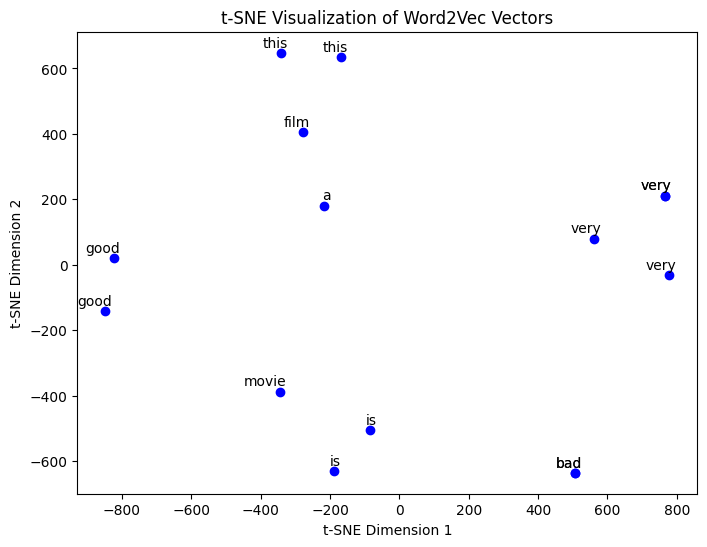

In [24]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


vectors = np.array([model.wv[word] for word in sentences])
print(vectors.shape)
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
vectors_2d = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='b')
for i, word in enumerate(sentences):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Visualization of Word2Vec Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [25]:
# Find similar words
def find_similar_words(model, word, topn=5):
    similar_words = model.wv.most_similar(word, topn=topn)
    return similar_words

# Words to find similar words for
words_to_find_similar = ['movie']

# Find similar words for each word
for word in words_to_find_similar:
    similar_words = find_similar_words(model, word)
    print(f"Similar words for '{word}': {similar_words}")

Similar words for 'movie': [('is', 0.4273154139518738), ('good', 0.2941223382949829), ('bad', 0.23243053257465363), ('film', 0.19733574986457825), ('a', -0.0218169167637825)]
